In [2]:
# import dataset
import pandas as pd
df=pd.read_csv('cleaned_student_social_media_addiction.csv')
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,0,2,10,5.2,1,1,6.5,6,1,3,8
1,22,1,0,39,2.1,7,0,7.5,8,2,0,3
2,20,0,2,102,6.0,6,1,5.0,5,0,4,9
3,18,1,1,101,3.0,11,0,7.0,7,2,1,4
4,21,1,0,18,4.5,0,1,6.0,6,1,2,7


In [3]:
# define target and training features
X=df.drop('Addicted_Score',axis=1)
y=df['Addicted_Score']

In [4]:
X.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media
0,19,0,2,10,5.2,1,1,6.5,6,1,3
1,22,1,0,39,2.1,7,0,7.5,8,2,0
2,20,0,2,102,6.0,6,1,5.0,5,0,4
3,18,1,1,101,3.0,11,0,7.0,7,2,1
4,21,1,0,18,4.5,0,1,6.0,6,1,2


In [5]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media
24,22,1,0,35,3.2,0,0,6.9,7,1,2
155,20,0,2,73,4.2,1,1,7.4,5,1,4
210,20,0,2,66,6.3,6,1,4.4,6,2,4
291,19,0,2,102,6.8,6,1,5.3,4,1,4
537,20,0,2,39,7.1,10,1,5.7,5,1,4


In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(563, 11) (141, 11) (563,) (141,)


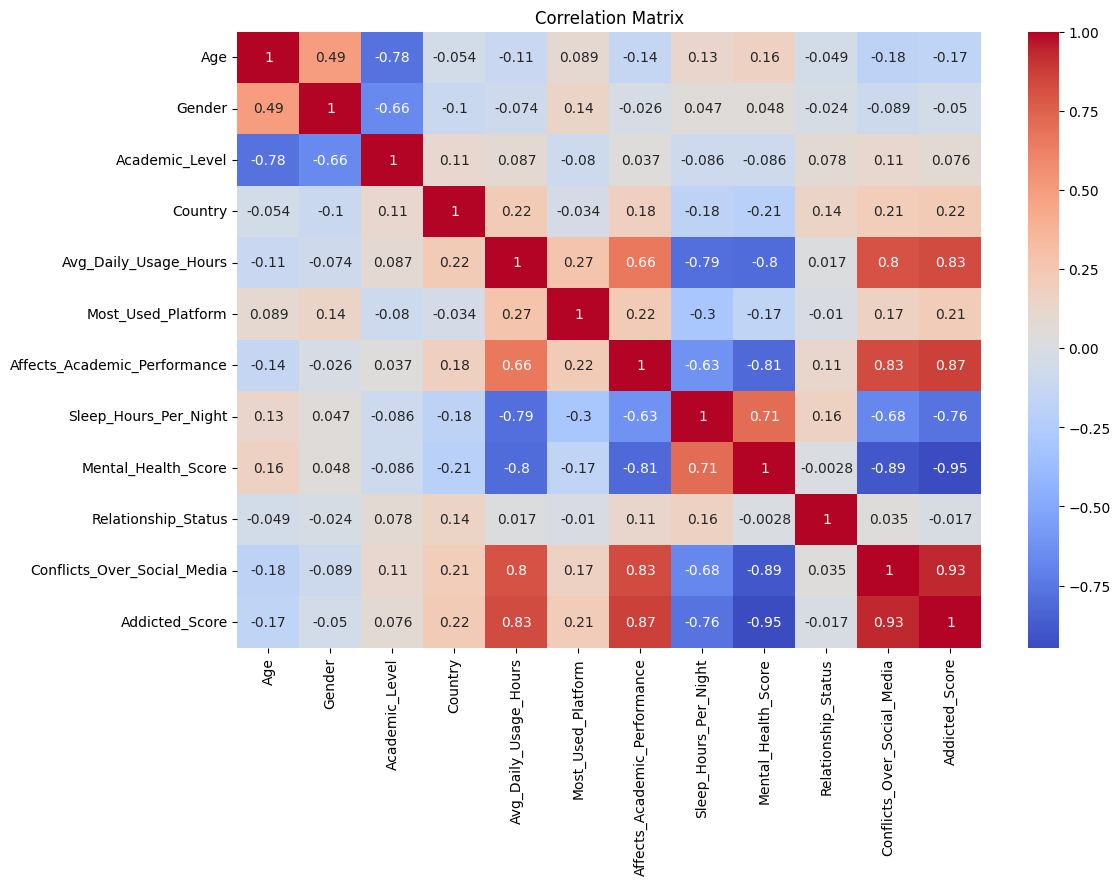

In [7]:
## correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# feature scaling and standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled

array([[ 0.92559087,  0.98413996, -1.04756304, ...,  0.68349902,
        -0.86353148, -0.88758504],
       [-0.50014828, -1.01611563,  0.98615417, ..., -1.14892931,
        -0.86353148,  1.22983182],
       [-0.50014828, -1.01611563,  0.98615417, ..., -0.23271514,
         0.87278361,  1.22983182],
       ...,
       [-0.50014828, -1.01611563,  0.98615417, ...,  0.68349902,
         0.87278361, -0.88758504],
       [-1.21301785, -1.01611563,  0.98615417, ..., -1.14892931,
        -0.86353148,  1.22983182],
       [-0.50014828,  0.98413996,  0.98615417, ..., -0.23271514,
        -0.86353148,  0.17112339]], shape=(563, 11))

In [10]:
#linear regression model
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = reg_model.predict(X_test_scaled)
y_pred

array([7.53343424, 6.94939165, 5.00090541, 7.1604766 , 3.78484489,
       5.03023322, 8.92404303, 4.34094028, 7.03171761, 7.06303531,
       7.71847713, 7.61245284, 8.51871654, 8.34472159, 3.8378722 ,
       5.07129239, 4.45744885, 4.44774385, 7.35053908, 7.98805357,
       5.14434464, 8.05562503, 4.92794978, 8.42593741, 4.00311867,
       5.10951304, 6.72939373, 6.98645239, 4.13652815, 6.96835041,
       8.84625012, 6.67428539, 4.98463021, 6.25272665, 4.6496124 ,
       3.87762402, 6.90310779, 7.23612971, 6.99021819, 4.97983127,
       7.52259198, 8.24227912, 4.87756522, 6.51238768, 7.66955727,
       8.35174253, 9.25068988, 3.77474208, 4.75268239, 7.70453958,
       7.17577645, 6.81959072, 4.16464401, 6.92715581, 6.85984365,
       8.27000578, 4.83517065, 7.04489073, 8.07899834, 8.25256998,
       6.92939678, 8.24867254, 6.08724933, 6.95386809, 6.81351391,
       4.93643009, 8.10635008, 6.89190602, 7.0302258 , 8.24548724,
       7.25927695, 7.06072915, 4.92395479, 8.11846845, 8.01677

In [12]:
## model evaluation
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.1017260309484671
R^2 Score: 0.9617459479971537


In [13]:
#redge  regression
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_ridge_pred = ridge_model.predict(X_test_scaled)

In [14]:
ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [15]:
# evulation redge regression
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')

Ridge Regression Mean Squared Error: 0.10170999575304611
Ridge Regression R^2 Score: 0.9617519780289342


In [16]:
# lasso regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_lasso_pred = lasso_model.predict(X_test_scaled)

In [17]:
lasso_model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [18]:
#evulation matrix for lasso regression
mse_lasso=mean_squared_error(y_test, y_lasso_pred)
r2_lasso=r2_score(y_test, y_lasso_pred)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')  
print(f'Lasso Regression R^2 Score: {r2_lasso}')

Lasso Regression Mean Squared Error: 0.11670152884161657
Lasso Regression R^2 Score: 0.9561144152436223


In [19]:
# elastic net regression
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)
y_enet_pred = elastic_net_model.predict(X_test_scaled)

In [20]:
# evulation matrix for elastic net regression
mse_enet=mean_squared_error(y_test, y_enet_pred)
r2_enet=r2_score(y_test, y_enet_pred)
print(f'Elastic Net Regression Mean Squared Error: {mse_enet}')  
print(f'Elastic Net Regression R^2 Score: {r2_enet}')

Elastic Net Regression Mean Squared Error: 0.11259842635677865
Elastic Net Regression R^2 Score: 0.9576573860482879


In [21]:
## apply support vector regression model
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_svr_pred = svr_model.predict(X_test_scaled)

In [22]:
# evulation matrix for support vector regression
mse_svr=mean_squared_error(y_test, y_svr_pred)
r2_svr=r2_score(y_test, y_svr_pred)
print(f'Support Vector Regression Mean Squared Error: {mse_svr}')  
print(f'Support Vector Regression R^2 Score: {r2_svr}')

Support Vector Regression Mean Squared Error: 0.0703988309840158
Support Vector Regression R^2 Score: 0.9735265347886582


In [23]:
# Cross validation and hyperparameter tuning for support vector regression
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True, random_state=42)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}   

svr_grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {svr_grid_search.best_params_}")
print(f"Best score: {svr_grid_search.best_score_}")

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: -0.08943171316303516


In [24]:
best_svr_model = svr_grid_search.best_estimator_
y_svr_tuned_pred = best_svr_model.predict(X_test_scaled)
mse_svr_tuned = mean_squared_error(y_test, y_svr_tuned_pred)
r2_svr_tuned = r2_score(y_test, y_svr_tuned_pred)
print(f'Tuned Support Vector Regression Mean Squared Error: {mse_svr_tuned}')  
print(f'Tuned Support Vector Regression R^2 Score: {r2_svr_tuned}')

Tuned Support Vector Regression Mean Squared Error: 0.0583333451748789
Tuned Support Vector Regression R^2 Score: 0.9780637581254867


In [25]:
# random forest regression for comparison
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_rf_pred = rf_model.predict(X_test_scaled)

In [26]:
# model evaluation for random forest regression
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')  
print(f'Random Forest Regression R^2 Score: {r2_rf}')

Random Forest Regression Mean Squared Error: 0.04536595744680851
Random Forest Regression R^2 Score: 0.9829401414844519


In [29]:

# Save the best model
import joblib

# Compare all models and save the best one
models_scores = {
    'Linear Regression': r2,
    'Ridge Regression': r2_ridge,
    'Lasso Regression': r2_lasso,
    'Elastic Net': r2_enet,
    'SVR': r2_svr,
    'Tuned SVR': r2_svr_tuned,
    'Random Forest': r2_rf
}

best_model_name = max(models_scores, key=models_scores.get)
best_model_score = models_scores[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best R^2 Score: {best_model_score}")
print("\nAll Models Comparison:")
for name, score in sorted(models_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")

# Save the best model
if best_model_name == 'Tuned SVR':
    joblib.dump(best_svr_model, 'best_model.pkl')
elif best_model_name == 'Random Forest':
    joblib.dump(rf_model, 'best_model.pkl')
elif best_model_name == 'Linear Regression':
    joblib.dump(reg_model, 'best_model.pkl')
elif best_model_name == 'Ridge Regression':
    joblib.dump(ridge_model, 'best_model.pkl')
elif best_model_name == 'Lasso Regression':
    joblib.dump(lasso_model, 'best_model.pkl')
elif best_model_name == 'Elastic Net':
    joblib.dump(elastic_net_model, 'best_model.pkl')
elif best_model_name == 'SVR':
    joblib.dump(svr_model, 'best_model.pkl')

print(f"\nBest model saved as 'best_model.pkl'")


Best Model: Random Forest
Best R^2 Score: 0.9829401414844519

All Models Comparison:
Random Forest: 0.9829
Tuned SVR: 0.9781
SVR: 0.9735
Ridge Regression: 0.9618
Linear Regression: 0.9617
Elastic Net: 0.9577
Lasso Regression: 0.9561

Best model saved as 'best_model.pkl'


In [30]:
# Save the scaler for later use in the Flask app
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


Prediction Results (first 10 samples):
     Actual  Predicted  Difference  Absolute Error
296       8       7.85        0.15            0.15
81        7       7.18       -0.18            0.18
77        5       4.96        0.04            0.04
208       7       7.00        0.00            0.00
318       4       3.95        0.05            0.05
277       5       4.97        0.03            0.03
244       9       9.00        0.00            0.00
323       4       4.08       -0.08            0.08
284       7       7.00        0.00            0.00
120       7       7.00        0.00            0.00

Mean Absolute Error: 0.0796
Mean Squared Error: 0.0454
     Actual  Predicted  Difference  Absolute Error
296       8       7.85        0.15            0.15
81        7       7.18       -0.18            0.18
77        5       4.96        0.04            0.04
208       7       7.00        0.00            0.00
318       4       3.95        0.05            0.05
277       5       4.97        0.03    

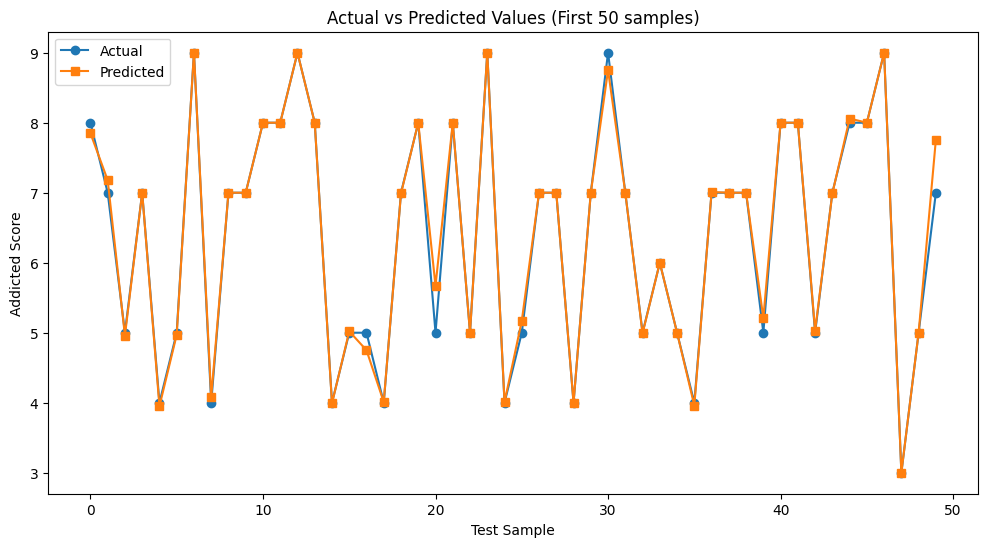

In [28]:
# predict output by a test data
import joblib

# Load the best model
best_model = joblib.load('best_model.pkl')

# Make predictions on test data
y_test_pred = best_model.predict(X_test_scaled)

# Display predictions vs actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Difference': y_test - y_test_pred,
    'Absolute Error': abs(y_test - y_test_pred)
})

print("Prediction Results (first 10 samples):")
print(results_df.head(10))

print(f"\nMean Absolute Error: {results_df['Absolute Error'].mean():.4f}")
print(f"Mean Squared Error: {(results_df['Difference']**2).mean():.4f}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_test_pred[:50], label='Predicted', marker='s')
plt.xlabel('Test Sample')
plt.ylabel('Addicted Score')
plt.title('Actual vs Predicted Values (First 50 samples)')
plt.legend()
plt.show()